In [48]:
#importing stuff
from io import StringIO
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [49]:
sample_rate = 32 #Hz
sensor_min = -1.5 * 9.8 #g
sensor_max =  1.5 * 9.8 #g
sample_res = 63

def normalData(_data):
    data = sensor_min + (_data/sample_res) * (sensor_max - sensor_min)
    return data

In [50]:
#%ls HMP_Dataset/Walk/
def parseAdlTxt(file):
    s = "HMP_Dataset/Walk/Accelerometer-2011-03-24-09-51-07-walk-f1.txt"
    data = np.genfromtxt(s, dtype=np.float32, delimiter=" ")
    #normalize data here
    return data

In [51]:
def getRecordsFromTxt(folderPath):
    for root, dirs, files in os.walk(folderPath, topdown=False):
#         print(root)
#         print(dirs)
        prev_shape = None
        records = [] #append a list
        for name in files:
            data = normalData(parseAdlTxt(os.path.join(root, name)))

            if(prev_shape != None and prev_shape != data.shape):
                print("Error: data sample length not uniform")
                exit(-1)
            else:
                prev_shape = data.shape

            records.append(data)
            #print(name, data.shape)
    return records

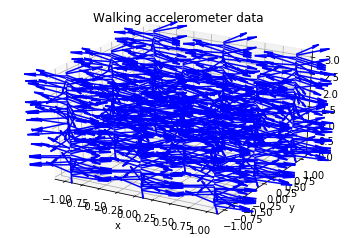

In [58]:
plot_start_samples = 60
plot_samples = 100
sub_sample_rate = 5

records = getRecordsFromTxt("HMP_Dataset/Walk/")
data = records[1]
data = data[plot_start_samples:(plot_samples*sub_sample_rate + plot_start_samples):sub_sample_rate]

x = np.linspace(-1,1,3)
y = np.linspace(-1,1,3)
# x = np.zeros([plot_samples])
# y = np.zeros([plot_samples])
z = np.linspace(0,plot_samples/sample_rate, plot_samples)

x,y,z = np.meshgrid(x,y,z)

fig = plt.figure()
ax = fig.gca(projection='3d')

#normalize sample-z for plotting
z_min = np.min(data[:,2])
z_max = np.max(data[:,2])
norm_factor = 1 / (z_max - z_min) / 4

data = np.swapaxes(data, 0, 1)
[bx, by, bz] = data
bx = bx - np.mean(bx)
by = by - np.mean(by)
bz = bz - np.mean(bz)

bx = np.zeros([3,3, plot_samples])[1,1,:] + bx
by = np.zeros([3,3, plot_samples])[1,1,:] + by
#bz = (bz * norm_factor) + z
bz = 0

ax.quiver(x,y,z,bx,by,bz,color='b',length=0.5,normalize=True)
plt.title('Walking accelerometer data')
plt.xlabel('x')
plt.ylabel('y')

plt.show()